In [1]:
import numpy as np
from IPython.display import Image
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_dir = ['I:/GHOLAMREZA_Z/ACHENY_LAST_224','I:/GHOLAMREZA_Z/ACHENY_LAST_64','I:/GHOLAMREZA_Z/ACHENY_LAST_224']
model_name=['EffB1','cheno','vgg16']
model_name_show=['Efficient_ACHENY','Cheno_scratch','Vgg_ACHENY']
precision=dict()
recall=dict()
average_precision=dict()

In [3]:
for i in range(3):
    with open(base_dir[i]+'/PR_'+model_name[i]+'.txt', 'r') as filehandle:  
            (precision_micro,recall_micro,average_precision_micro) = json.load(filehandle)
            precision[i]=precision_micro
            recall[i]=recall_micro
            average_precision[i]=average_precision_micro
with open(base_dir[0]+'/PR_class.txt', 'r') as filehandle:  
            (class_name) = json.load(filehandle)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


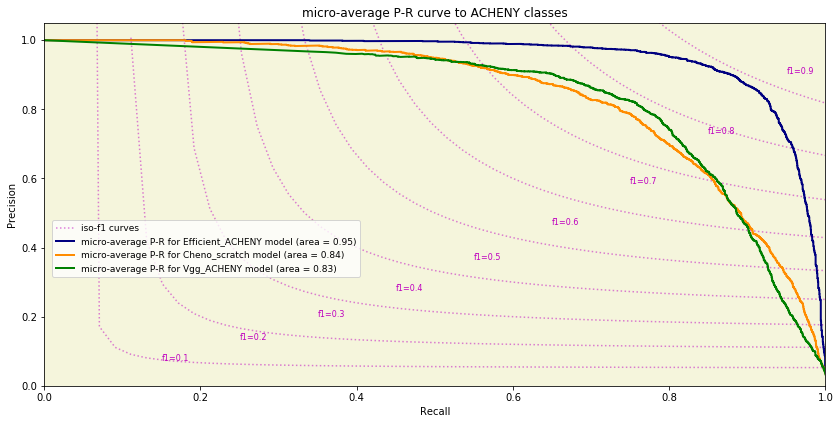

In [70]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'darkorange', 'green', 'gold'])#'teal','cornflowerblue','turquoise','navy'

plt.figure(figsize=(14, 8))

f_scores = np.linspace(0.1, 0.9, num=9)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], 'm:', alpha=0.5)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.05+f_score, y[45] + 0.02),fontsize=8, color='m')

lines.append(l)
labels.append('iso-f1 curves')

for i, color in zip(range(3), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('micro-average P-R for {0} model (area = {1:0.2f})'
                  ''.format(model_name_show[i], average_precision[i]))

fig = plt.gcf()
#fig.set_size_inches(8,3.1)
fig.subplots_adjust(bottom=0.25)
plt.subplot(111)
ax1=plt.gca()
ax1.bar(0.0,height=1.05,width=1.0,align='edge',color='beige')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall',fontsize=10,color='k')
plt.ylabel('Precision',fontsize=10,color='k')
plt.title('micro-average P-R curve to ACHENY classes')
plt.legend(lines, labels,prop=dict(size=9),loc=(0.01, 0.3))
#plt.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

plt.savefig('K:/Paper/paper1_ver12_IJPRAI_Revised/PR_curve', ext="jpg", close=False, verbose=True, dpi=300)#, bbox_inches='tight', pad_inches=0.01)
plt.show()